#**Question 1: Intel Image Classification**

##**Problem Statement:**
An Image Classification problem is solved by building and training a model by deep ANN. The same model is also trained by CNN so that, we can analyse or compare these two models and find out which model gives us more accurate output.

###**Expected Outcome:**
The model should be able to classify the images in 6 different classes.

There should be an improvement in accuracy.

We need to find out which model is fast.

We need to find out which model can extract more imporatant features and is more robust.


##**Dataset Description:**

This image data set focuses on natural scenes. It was created by Intel for an image
classification competition. Approximately 25,000 images are there in the dataset.
Images are grouped into categories such as buildings, forests, glaciers, mountains, seas,
and streets.
Dataset is divided into folders for training, testing, and prediction:

14,000 training images

3,000 validation images

7,000 test images

Link to the Dataset:

URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [163]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from random import randint
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [164]:
#Install Kaggle
!pip install -q kaggle

In [165]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nishitanamdeo","key":"a307b56a7a439550b3912671146d2014"}'}

In [166]:
# create a Kaggle Forlder
!mkdir -p ~/.kaggle
# copy the kaggle.json file to folder created 
!cp kaggle.json ~/.kaggle

In [167]:
!kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [168]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [169]:
import glob
buildings = glob.glob('/content/seg_test/seg_test/buildings/*.*')
forest = glob.glob('/content/seg_test/seg_test/forest/*.*')
glacier = glob.glob('/content/seg_test/seg_test/glacier/*.*')
mountain = glob.glob('/content/seg_test/seg_test/moutain/*.*')
sea = glob.glob('/content/seg_test/seg_test/sea/*.*')
street = glob.glob('/content/seg_test/seg_test/street/*.*')

In [170]:
data = []
labels = []

In [171]:
for i in buildings:   
    image=tf.keras.preprocessing.image.load_img(i,target_size= (28,28))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in forest:   
    image=tf.keras.preprocessing.image.load_img(i,target_size=(28,28))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in glacier:   
    image=tf.keras.preprocessing.image.load_img(i,target_size= (28,28))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in mountain:   
    image=tf.keras.preprocessing.image.load_img(i,target_size=(28,28))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in sea:   
    image=tf.keras.preprocessing.image.load_img(i,target_size=(28,28))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in street:    
    image=tf.keras.preprocessing.image.load_img(i,target_size=(28,28))
    image=np.array(image)
    data.append(image)
    labels.append(3)

In [172]:
data = np.array(data)
labels = np.array(labels)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2)

In [174]:
X_train.shape

(1980, 28, 28, 3)

In [175]:
X_train[0,:].shape

(28, 28, 3)

In [176]:
ytrain.shape

(1980,)

In [177]:
labels = {'glacier', 'mountain', 'sea', 'street', 'forest', 'buildings'}

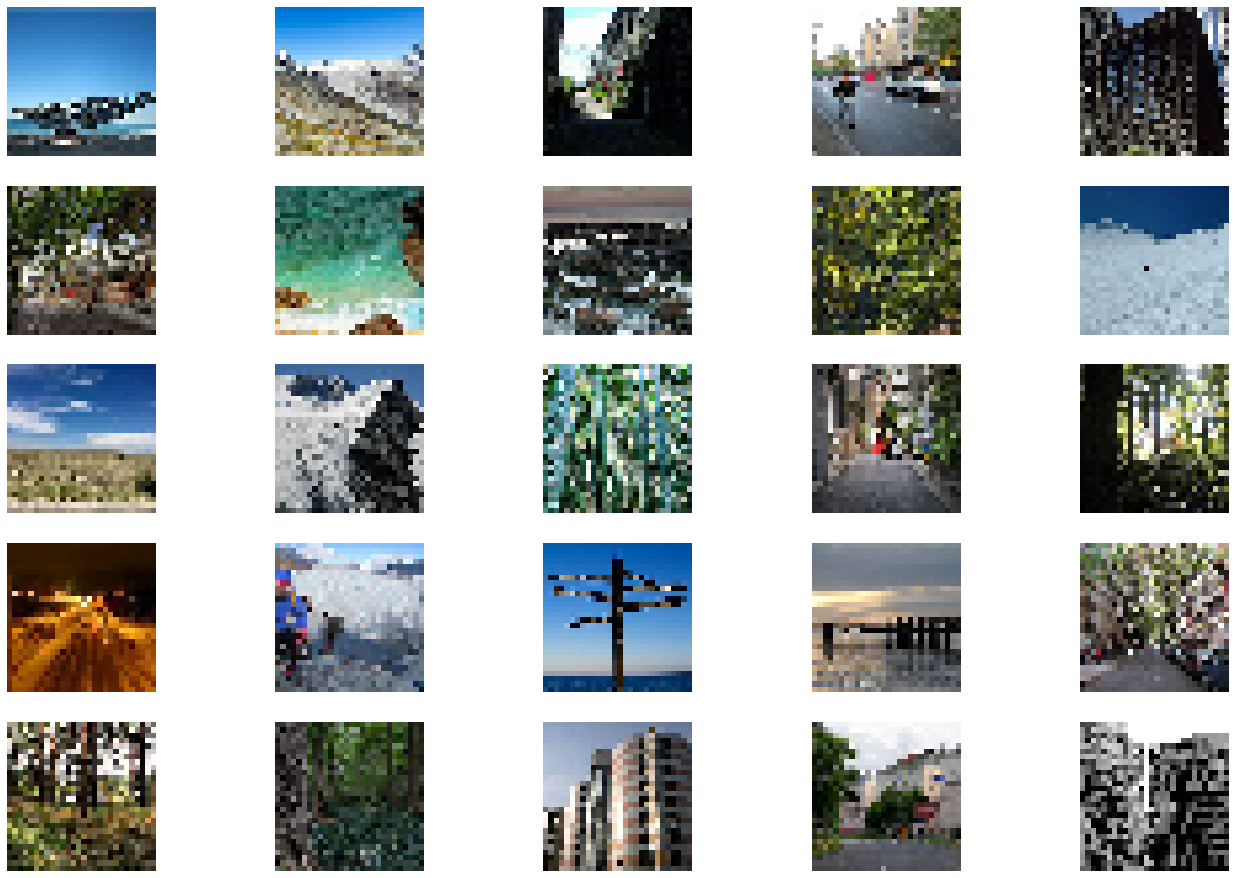

In [178]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(X_train))
        ax[i,j].imshow(X_train[rnd_number])
        ax[i,j].axis('off')

In [179]:
X_train.shape

(1980, 28, 28, 3)

In [180]:
X_test.shape

(495, 28, 28, 3)

In [181]:
X_train.shape

(1980, 28, 28, 3)

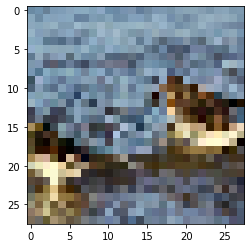

image : 0


In [182]:
ind = 5
sample_image = X_train[ind]    
pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print('image :',np.argmax(ytrain[ind]))

In [183]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(ytrain, len(labels))
y_test = keras.utils.to_categorical(ytest, len(labels))

1980 train samples
495 test samples


In [184]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [185]:
X_train.shape

(1980, 28, 28, 3)

In [186]:
y_train.shape

(1980, 6)

In [187]:
#ANN Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28,3]),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model.layers

In [188]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 2352)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              2409472   
                                                                 
 dense_22 (Dense)            (None, 600)               615000    
                                                                 
 dense_23 (Dense)            (None, 300)               180300    
                                                                 
 dense_24 (Dense)            (None, 6)                 1806      
                                                                 
Total params: 3,206,578
Trainable params: 3,206,578
Non-trainable params: 0
_________________________________________________________________


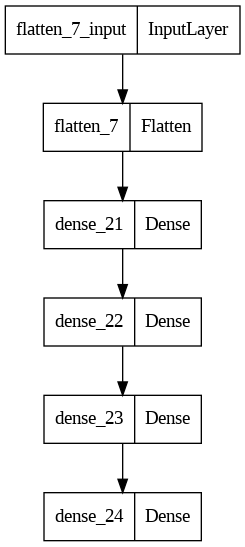

In [190]:
from keras.utils import plot_model
plot_model(model)

In [191]:
history = model.fit(X_train, y_train, epochs= 12, validation_data=(X_test, y_test))

Epoch 1/12
62/62 [==============================] - 7s 45ms/step - loss: 1.2822 - accuracy: 0.4909 - val_loss: 0.9805 - val_accuracy: 0.6121
Epoch 2/12
62/62 [==============================] - 3s 42ms/step - loss: 0.9784 - accuracy: 0.5995 - val_loss: 0.9254 - val_accuracy: 0.6141
Epoch 3/12
62/62 [==============================] - 3s 42ms/step - loss: 0.8868 - accuracy: 0.6465 - val_loss: 0.8872 - val_accuracy: 0.6606
Epoch 4/12
62/62 [==============================] - 3s 53ms/step - loss: 0.8627 - accuracy: 0.6646 - val_loss: 0.9011 - val_accuracy: 0.6404
Epoch 5/12
62/62 [==============================] - 3s 45ms/step - loss: 0.8051 - accuracy: 0.6768 - val_loss: 0.8334 - val_accuracy: 0.6687
Epoch 6/12
62/62 [==============================] - 3s 42ms/step - loss: 0.7620 - accuracy: 0.7056 - val_loss: 0.9359 - val_accuracy: 0.6283
Epoch 7/12
62/62 [==============================] - 3s 41ms/step - loss: 0.6908 - accuracy: 0.7414 - val_loss: 0.8052 - val_accuracy: 0.6929
Epoch 8/12
62

In [192]:
history.history

{'loss': [1.2822165489196777,
  0.9784033298492432,
  0.8868299126625061,
  0.8627234101295471,
  0.8051255345344543,
  0.7619574069976807,
  0.6908124089241028,
  0.6802635192871094,
  0.6274318099021912,
  0.6005785465240479,
  0.5530803799629211,
  0.5650814175605774],
 'accuracy': [0.4909090995788574,
  0.5994949340820312,
  0.6464646458625793,
  0.6646464467048645,
  0.6767676472663879,
  0.7055555582046509,
  0.7414141297340393,
  0.7348484992980957,
  0.7626262903213501,
  0.776262640953064,
  0.7959595918655396,
  0.776262640953064],
 'val_loss': [0.9805256128311157,
  0.9253577589988708,
  0.8871610164642334,
  0.901115357875824,
  0.8333589434623718,
  0.9358645677566528,
  0.8051934838294983,
  0.8554356098175049,
  1.056417465209961,
  0.840328574180603,
  0.8818807601928711,
  1.0772349834442139],
 'val_accuracy': [0.6121212244033813,
  0.6141414046287537,
  0.6606060862541199,
  0.6404040455818176,
  0.6686868667602539,
  0.6282828450202942,
  0.6929292678833008,
  0.6787

In [193]:
predicted = model.predict(X_test)

16/16 [==============================] - 0s 8ms/step


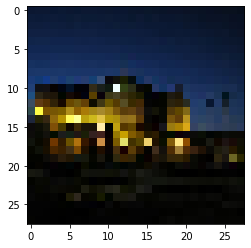

 Real label : 0
 Predicted label: 0


In [194]:
#Prediction:1
ind = 60
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

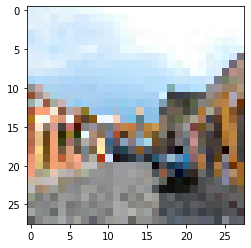

 Real label : 3
 Predicted label: 2


In [195]:
#Prediction:2
ind = 100
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

###We can clearly observe that the current model is unable to predict the image ind:100 correctly.

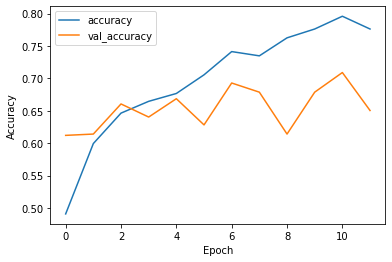

In [196]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

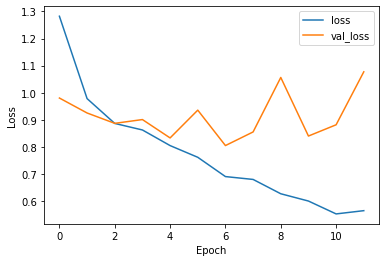

In [197]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

#**Second Method: CNN Model**

In [198]:
two = Sequential()
two.add(Conv2D(32, (3,3), input_shape= (28,28,3), activation = 'relu', padding = 'same'))
two.add(MaxPooling2D())

two.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
two.add(MaxPooling2D())

two.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
two.add(MaxPooling2D())

two.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
two.add(MaxPooling2D())

two.add(Flatten())

two.add(Dense(256, activation='relu'))
two.add(Dropout(0.3))
two.add(Dense(6, activation = 'softmax'))
two.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [199]:
two.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 128)       

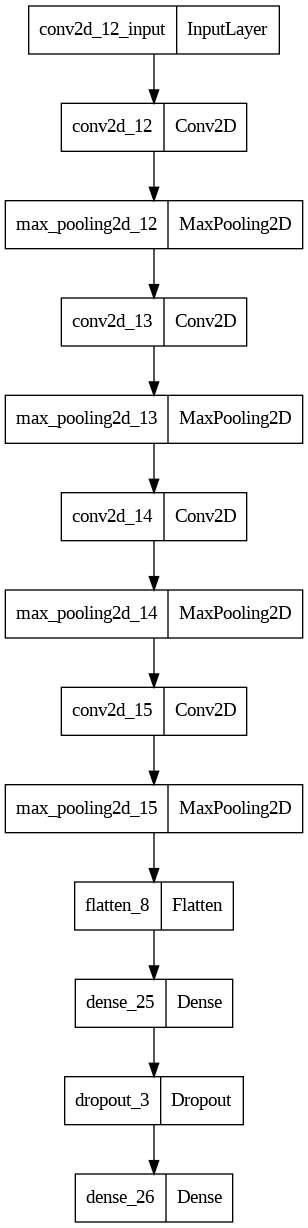

In [200]:
from keras.utils import plot_model
plot_model(two)

In [201]:
history_two = two.fit(X_train, y_train, epochs= 12, validation_data=(X_test, y_test))

Epoch 1/12
62/62 [==============================] - 8s 112ms/step - loss: 1.0843 - accuracy: 0.5646 - val_loss: 0.7754 - val_accuracy: 0.7131
Epoch 2/12
62/62 [==============================] - 5s 87ms/step - loss: 0.7809 - accuracy: 0.7000 - val_loss: 0.6366 - val_accuracy: 0.7374
Epoch 3/12
62/62 [==============================] - 7s 107ms/step - loss: 0.6803 - accuracy: 0.7485 - val_loss: 0.5863 - val_accuracy: 0.7737
Epoch 4/12
62/62 [==============================] - 5s 87ms/step - loss: 0.6736 - accuracy: 0.7470 - val_loss: 0.5928 - val_accuracy: 0.7778
Epoch 5/12
62/62 [==============================] - 7s 107ms/step - loss: 0.5685 - accuracy: 0.7970 - val_loss: 0.5088 - val_accuracy: 0.8121
Epoch 6/12
62/62 [==============================] - 5s 87ms/step - loss: 0.5180 - accuracy: 0.8076 - val_loss: 0.5208 - val_accuracy: 0.8061
Epoch 7/12
62/62 [==============================] - 6s 102ms/step - loss: 0.4308 - accuracy: 0.8429 - val_loss: 0.4904 - val_accuracy: 0.8404
Epoch 8/1

In [202]:
history_two.history

{'loss': [1.0843226909637451,
  0.7809032797813416,
  0.6803450584411621,
  0.673637330532074,
  0.5685070753097534,
  0.5180133581161499,
  0.43083423376083374,
  0.38315674662590027,
  0.3527625799179077,
  0.34394943714141846,
  0.28027817606925964,
  0.21812088787555695],
 'accuracy': [0.5646464824676514,
  0.699999988079071,
  0.7484848499298096,
  0.7469696998596191,
  0.7969697117805481,
  0.8075757622718811,
  0.8429293036460876,
  0.8671717047691345,
  0.8808080554008484,
  0.8767676949501038,
  0.8984848260879517,
  0.9247474670410156],
 'val_loss': [0.7753652930259705,
  0.6366134285926819,
  0.5863295793533325,
  0.5928083062171936,
  0.5087512731552124,
  0.5207754969596863,
  0.4903639256954193,
  0.4876134991645813,
  0.4899978041648865,
  0.49306783080101013,
  0.469068706035614,
  0.6368446350097656],
 'val_accuracy': [0.713131308555603,
  0.7373737096786499,
  0.773737370967865,
  0.7777777910232544,
  0.8121212124824524,
  0.8060606122016907,
  0.8404040336608887,
  

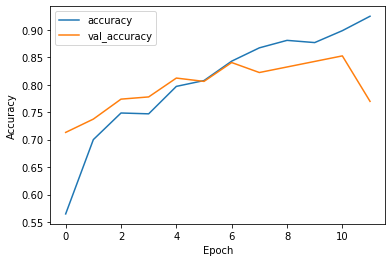

In [203]:
plt.plot(history_two.history['accuracy'], label='accuracy')
plt.plot(history_two.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

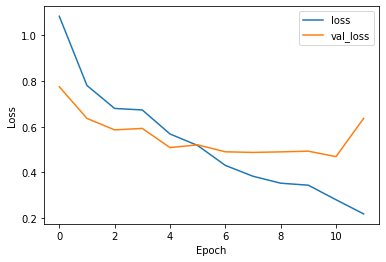

In [204]:
plt.plot(history_two.history['loss'], label='loss')
plt.plot(history_two.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [205]:
predicted2 = two.predict(X_test)

16/16 [==============================] - 0s 18ms/step


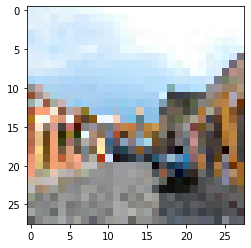

 Real label : 3
 Predicted label: 3


In [206]:
ind = 100
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted2[ind]))

###In the previous ANN model we have observed that the model isn't able to predict the image ind:100 correctly.
###But our second model which is trained/built using CNN is more accurate and is able to predict it correctly

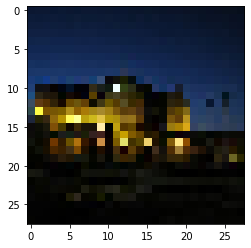

 Real label : 0
 Predicted label: 0


In [207]:
ind = 60
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28,3))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted2[ind]))

#**Conclusion:**

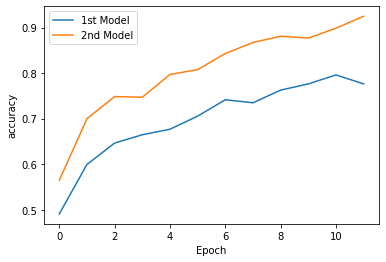

In [211]:
plt.plot(history.history['accuracy'], label='1st Model')
plt.plot(history_two.history['accuracy'], label='2nd Model')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

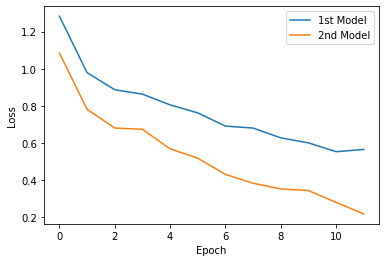

In [210]:
plt.plot(history.history['loss'], label='1st Model')
plt.plot(history_two.history['loss'], label='2nd Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

###From the above plots we can clearly observe that the CNN model is more accurate as compared to ANN model. This is because in ANN each neuron in one layer is connected to every neuron in the next layer, leading to a large number of parameters that need to be learned. 

###In contrast, CNNs use parameter sharing where each neuron in a layer is only connected to a small subset of neurons in the next layer, reducing the number of parameters and making it easier to train the network.

###CNN can extract more meaningful features from the images and achieves high accuracy. Also CNN is more robust to changes in images such as changes in lighting or orientation since it can learn to recognize patterns in a more general way.